In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
ds= pd.read_csv('ClusterMain.csv')

In [30]:
ds

,자치구명,층,임대면적,보증금,계약일,건축년도,임대건물명,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수
0,용산구,1,59.61,11500,2022-01-03,1949,단독/다가구,27153,1.5,67.5,2,175.40,2.63,104.69,3634.3,4.2
1,동작구,1,58.80,30000,2022-01-03,1994,단독/다가구,27153,1.5,67.5,2,175.40,2.63,104.69,3634.3,4.2
2,강서구,10,156.88,78000,2022-01-03,2002,아파트,27153,1.5,67.5,2,175.40,2.63,104.69,3634.3,4.2
3,영등포구,16,121.53,83000,2022-01-03,2001,아파트,27153,1.5,67.5,2,175.40,2.63,104.69,3634.3,4.2
4,마포구,18,157.30,110000,2022-01-03,2003,아파트,27153,1.5,67.5,2,175.40,2.63,104.69,3634.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80016,용산구,5,101.95,40000,2022-05-06,1971,아파트,28310,0.5,65.0,1,175.55,3.63,107.56,3656.1,3.3
80017,동작구,3,38.12,36000,2022-05-06,2015,다세대/연립,28310,0.5,65.0,1,175.55,3.63,107.56,3656.1,3.3
80018,동작구,1,31.71,22050,2022-05-06,2014,다세대/연립,28310,0.5,65.0,1,175.55,3.63,107.56,3656.1,3.3
80019,강동구,10,15.94,13650,2022-05-06,2012,아파트,28310,0.5,65.0,1,175.55,3.63,107.56,3656.1,3.3


In [31]:
ds.set_index('계약일', inplace = True)

In [32]:
#범주형/연속형 변수 분리
cat_col = ['자치구명', '임대건물명', '정책성향']
con_col = ['층', '임대면적', '건축년도', '경제활동인구', '기준금리', '전세가격비율', '아파트매매실거래지수', '회사채수익률', '소비자물가지수', '통화량', '광공업지수']

In [33]:
ds_raw = ds.copy() #원본 데이터 copy

In [34]:
#get_dummies()로 범주형 변수 원핫인코딩
ds = pd.get_dummies(ds, columns=cat_col, drop_first=True)

In [35]:
ds

,층,임대면적,보증금,건축년도,경제활동인구,기준금리,전세가격비율,아파트매매실거래지수,회사채수익률,소비자물가지수,...,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔,정책성향_2
계약일,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1,59.61,11500,1949,27153,1.5,67.5,175.40,2.63,104.69,...,0,1,0,0,0,0,1,0,0,1
2022-01-03,1,58.80,30000,1994,27153,1.5,67.5,175.40,2.63,104.69,...,0,0,0,0,0,0,1,0,0,1
2022-01-03,10,156.88,78000,2002,27153,1.5,67.5,175.40,2.63,104.69,...,0,0,0,0,0,0,0,1,0,1
2022-01-03,16,121.53,83000,2001,27153,1.5,67.5,175.40,2.63,104.69,...,1,0,0,0,0,0,0,1,0,1
2022-01-03,18,157.30,110000,2003,27153,1.5,67.5,175.40,2.63,104.69,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,5,101.95,40000,1971,28310,0.5,65.0,175.55,3.63,107.56,...,0,1,0,0,0,0,0,1,0,0
2022-05-06,3,38.12,36000,2015,28310,0.5,65.0,175.55,3.63,107.56,...,0,0,0,0,0,0,0,0,0,0
2022-05-06,1,31.71,22050,2014,28310,0.5,65.0,175.55,3.63,107.56,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#train, test, val 분리
X = ds.drop(columns='보증금')
y = ds[['보증금']]

In [37]:
X

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,...,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔,정책성향_2
계약일,,,,,,,,,,,,,,,,,,,,,
2022-01-03,1,59.61,1949,27153,1.5,67.5,175.40,2.63,104.69,3634.3,...,0,1,0,0,0,0,1,0,0,1
2022-01-03,1,58.80,1994,27153,1.5,67.5,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,1,0,0,1
2022-01-03,10,156.88,2002,27153,1.5,67.5,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,0,1,0,1
2022-01-03,16,121.53,2001,27153,1.5,67.5,175.40,2.63,104.69,3634.3,...,1,0,0,0,0,0,0,1,0,1
2022-01-03,18,157.30,2003,27153,1.5,67.5,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,5,101.95,1971,28310,0.5,65.0,175.55,3.63,107.56,3656.1,...,0,1,0,0,0,0,0,1,0,0
2022-05-06,3,38.12,2015,28310,0.5,65.0,175.55,3.63,107.56,3656.1,...,0,0,0,0,0,0,0,0,0,0
2022-05-06,1,31.71,2014,28310,0.5,65.0,175.55,3.63,107.56,3656.1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [39]:
X_train

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,...,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔,정책성향_2
계약일,,,,,,,,,,,,,,,,,,,,,
2022-01-17,1,46.36,1993,28012,0.5,64.9,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,1,0,0,0
2022-03-05,15,29.53,2004,28310,0.5,65.3,175.10,3.03,106.06,3656.1,...,0,1,0,0,0,0,0,1,0,0
2022-05-06,2,84.41,1989,28310,0.5,65.0,175.55,3.63,107.56,3656.1,...,0,0,0,0,0,0,0,1,0,0
2022-02-17,1,18.00,2012,28310,0.5,65.3,173.70,2.87,105.30,3656.1,...,0,0,0,0,0,0,1,0,0,0
2022-04-02,11,75.51,1986,28310,0.5,65.0,175.55,3.63,106.85,3656.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,2,84.64,2019,28012,0.5,65.1,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,0,1,0,0
2022-03-20,6,28.13,2022,28310,0.5,65.0,175.10,3.03,106.06,3656.1,...,0,0,0,0,0,0,0,0,0,0
2022-04-28,5,46.34,2015,28310,0.5,65.0,175.55,3.63,106.85,3656.1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#연속형 변수 스케일링
scaler = StandardScaler()
scaler.fit(X_train.loc[:,con_col])

X_train.loc[:,con_col] = scaler.transform(X_train.loc[:,con_col])
X_test.loc[:,con_col]  = scaler.transform(X_test.loc[:,con_col])
X_val.loc[:,con_col]   = scaler.transform(X_val.loc[:,con_col])

In [41]:
import lightgbm as lgb

In [43]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_val)
#accuracy_score(y_val, y_pred)

c:\Users\cmkm_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\cmkm_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
#파라미터는 dict에
param = {'num_leaves': 31, 'objective': 'binary', 'metric':'auc'}

#train data를 별도의 Dataset객체로 만들어야 함
train_data = lgb.Dataset(X_train, label=y_train.values)

#boosting을 몇 번 할건지 결정
num_round = 10 

#모델에 훈련
bst = lgb.train(param, train_data, num_round)

#예측
y_pred_val = bst.predict(X_val)
print(y_pred_val)

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 48012, number of negative: 0
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 48012, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightG

c:\Users\cmkm_\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [53]:
#확률값을 라벨값으로
y_pred_val = pd.Series(y_pred_val).apply(lambda x: 1 if x>=0.5 else 0) 

#성능평가
#accuracy_score(y_val, y_pred_val)

NameError: name 'accuracy_score' is not defined

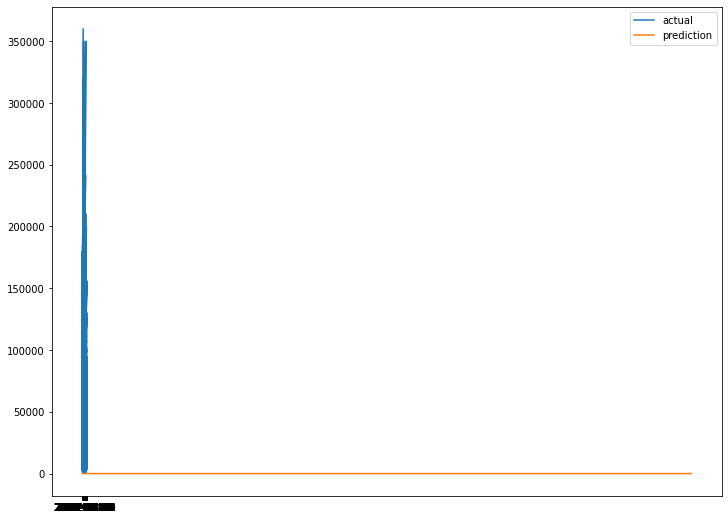

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label = 'actual')
plt.plot(y_pred_val, label = 'prediction')
plt.legend()
plt.show()

In [55]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred_val)}")

MAPE: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16001   NaN
16002   NaN
16003   NaN
16004   NaN
보증금     NaN
Length: 16006, dtype: float64


In [ ]:
from sklearn import metrics

print("MAE : " + str(metrics.mean_absolute_error(y_val, y_pred_val)))
print("MSE : " + str(metrics.mean_squared_error(y_val, y_pred_val)))
print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))))
print("R^2 : " + str(metrics.r2_score(y_val,y_pred_val)))